<a href="https://colab.research.google.com/github/gkkhnyldz/pi_intern_question/blob/main/VirusDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's first check the types of our values in the dataset.

In [77]:

import numpy as np
import pandas as pd

df=pd.read_csv('dataset.csv')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1897 non-null   float64
 1   feature_2  1899 non-null   float64
 2   feature_3  1893 non-null   float64
 3   feature_4  1897 non-null   float64
 4   isVirus    1999 non-null   bool   
dtypes: bool(1), float64(4)
memory usage: 64.5 KB


Let's check if there is any correlation between our variables.





<AxesSubplot:>

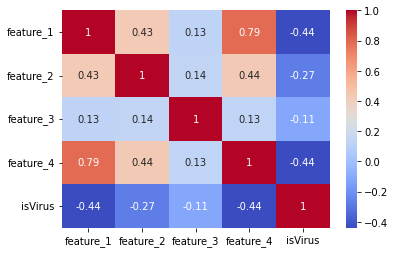

In [79]:
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


There is a correlation of 0.79 between feature 1 and feature 4. It can be investigated where these features come from and what they represent. After researching their meaning, further analysis can be conducted on these features.

Let's examine the distribution of viruses.

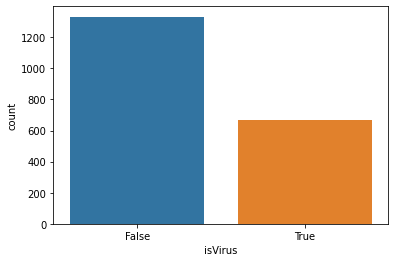

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='isVirus', data=df)
plt.show()


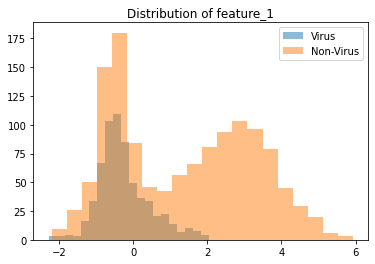

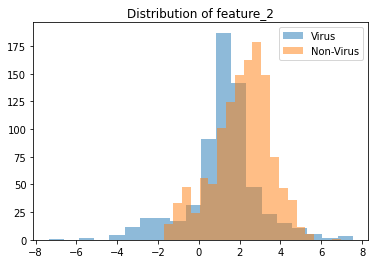

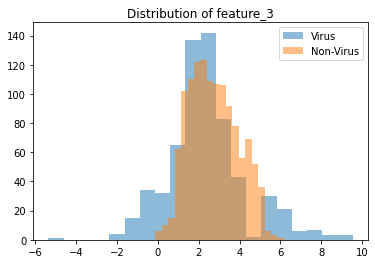

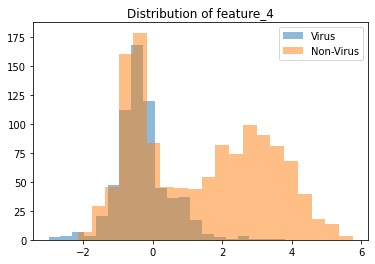

In [82]:
import matplotlib.pyplot as plt

virus_df = df[df['isVirus'] == True]
nonvirus_df = df[df['isVirus'] == False]

features = ['feature_1', 'feature_2', 'feature_3', 'feature_4']

for feature in features:
    plt.hist(virus_df[feature], bins=20, alpha=0.5, label='Virus')
    plt.hist(nonvirus_df[feature], bins=20, alpha=0.5, label='Non-Virus')
    plt.legend(loc='upper right')
    plt.title(f'Distribution of {feature}')
    plt.show()


Based on this, it can be seen that viruses are mostly present in the -2 to 0 value range of feature 1 and feature 4. In features 2 and 3, viruses are mostly present in the range of 0 to 4. Therefore, further analysis is required on the data with these value ranges.

In [152]:
df["isVirus"] = df["isVirus"].astype(int)



# feature 1 ve feature 4 verilerindeki -2 ile 0 arasındaki verilerin sayısını hesapla
count = df[(df['feature_1'] >= -2) & (df['feature_1'] <= 0) & (df['feature_4'] >= -2) & (df['feature_4'] <= 0)]['isVirus'].sum()
y=df[(df['feature_1'] >= -2) & (df['feature_1'] <= 0) & (df['feature_4'] >= -2) & (df['feature_4'] <= 0)]['isVirus']
a=df['isVirus'].sum()
# Sonucu yazdır
print(f" there is {y.size} data  within the specified range.")
print(f"{count} Virus detected within the specified range.")
print(f"{a} Virus detected within the specified data.")



 there is 706 data  within the specified range.
352 Virus detected within the specified range.
667 Virus detected within the specified data.


In [ ]:
Based on these data, it can be suggested that the IT team should work on these data. More than half of the total 667 viruses are found in only 706 data, while 300 of them are found in the dataset of 1300.

Here, we are trying to fill our missing values with the median and testing for our models. Then, we will fill the missing values with KNN and examine the results for our models.

Average accuracy in  10 - fold cross-validation for KNN with K= 1  is  0.833964824120603
Average accuracy in  10 - fold cross-validation for KNN with K= 3  is  0.8479698492462311
Average accuracy in  10 - fold cross-validation for KNN with K= 5  is  0.8519673366834171
Average accuracy in  10 - fold cross-validation for KNN with K= 7  is  0.8504723618090452
Average accuracy in  10 - fold cross-validation for KNN with K= 9  is  0.8429723618090452
Average accuracy in  10 - fold cross-validation for KNN with K= 11  is  0.8414723618090452
Average accuracy in  10 - fold cross-validation for KNN with K= 13  is  0.8369698492462312
Average accuracy in  10 - fold cross-validation for KNN with K= 15  is  0.831967336683417
Average accuracy in  10 - fold cross-validation for KNN with K= 17  is  0.829967336683417
Average accuracy in  10 - fold cross-validation for KNN with K= 19  is  0.8244673366834171
Average accuracy in  10 - fold cross-validation for KNN with K= 21  is  0.8254648241206031
Average

Text(0.5, 1.0, 'K-fold Cross Validation, Test Accuracies with respect to K (for KNN)')

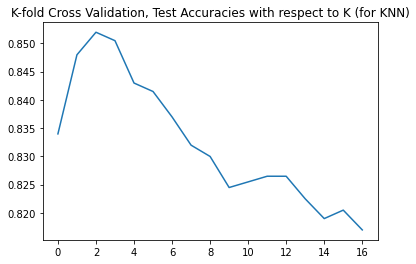

In [88]:
from sklearn.model_selection import StratifiedKFold

from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
#We classify our data over knn by calling the Knn algorithm from the #Sklearn library
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import statistics


imputer = SimpleImputer(strategy='median')

scores = []
kfold = 10

skfolds = StratifiedKFold(n_splits=kfold)
X = imputer.fit_transform(X)

bestScore = 0
bestK = 0
for k in range(1, 35, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knnScores = cross_val_score(knn, X, y, cv=kfold, scoring="accuracy")
  
    X = df.drop('isVirus', axis=1) # featurelar
    X = imputer.fit_transform(X)

    y = df['isVirus'] # hedef sütun

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)

    y_pred_knn= knn.predict(X_test)

    knnScore = statistics.mean(knnScores)
    scores.append(knnScore)
    
    print('Average accuracy in ', kfold, '- fold cross-validation for KNN with K=', k, ' is ', knnScore)
    if knnScore > bestScore:
        bestScore = knnScore
        bestK = k

print('')
print('Best K is ', bestK, ' with best score as ', bestScore)

plt.plot(scores)
plt.title('K-fold Cross Validation, Test Accuracies with respect to K (for KNN)')


Here we choose the value of k as 5, which gave the best result.

In [89]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn= knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print('Accuracy:', accuracy)


Accuracy: 0.85


Create a MLPClassifier model

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-layer perceptron neural network
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7925


In [96]:
##Here again, we call the svm classifier from the sklearn library and get the results."""
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np
import pandas as pd

clf = SVC(kernel='linear', C=1, random_state=42)


scores = cross_val_score(clf, X, y, cv=5)

mean_accuracy = np.mean(scores)

print("Cross-Validation Sonuçları: ", scores)
print("Ortalama Doğruluk Değeri: ", mean_accuracy)


from sklearn import svm

svm = svm.SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


print("Test accuracy score for SVM classification is: ",metrics.accuracy_score(y_test, y_pred_svm))

Cross-Validation Sonuçları:  [0.46       0.2575     0.6625     0.665      0.66666667]
Ortalama Doğruluk Değeri:  0.5423333333333333
Test accuracy score for SVM classification is:  0.68


In [97]:
##Here, we finally classify using the Naïve Bayes library on our data.
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Test accuracy score for Naive Bayes classification is: ",metrics.accuracy_score(y_test, y_pred_nb))

Test accuracy score for Naive Bayes classification is:  0.6825


In [98]:
## Likewise, by calling the confusion_matrix algorithm from the sklearn.metrics library, 
##we create confusion matrixes of the predictions we made above with different classifications.
from sklearn.metrics import confusion_matrix, classification_report

conf_mtrx_knn = confusion_matrix(y_test, y_pred_knn)
conf_mtrx_svm = confusion_matrix(y_test, y_pred_svm)
conf_mtrx_nb = confusion_matrix(y_test, y_pred_nb)
conf_mtrx_multly = confusion_matrix(y_test, y_pred)

classification_report_knn = classification_report(y_test, y_pred_knn)
classification_report_svm = classification_report(y_test, y_pred_svm)
classification_report_nb = classification_report(y_test, y_pred_nb)
classification_report_multly = classification_report(y_test, y_pred)

from matplotlib import pyplot as plt

def plot_confusion_matrix(conf_mtrx, classes, cmap=plt.cm.Blues):
    num_class = conf_mtrx.shape[0]

    fig, ax = plt.subplots()
    im = ax.imshow(conf_mtrx, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(num_class), yticks=np.arange(num_class),
           xticklabels=classes, yticklabels=classes, 
           ylabel='True label', xlabel='Predicted label')

    middle_threshold = conf_mtrx.max() / 2.
    for row in range(num_class):
        for col in range(num_class):
            ax.text(col, row, format(conf_mtrx[row, col], '.0f'), ha="center", va="center",
                    color="white" if conf_mtrx[row, col] > middle_threshold else "black")
    fig.tight_layout()
    plt.show()



We use the confusion matrix to see how accurately we predicted the viruses.





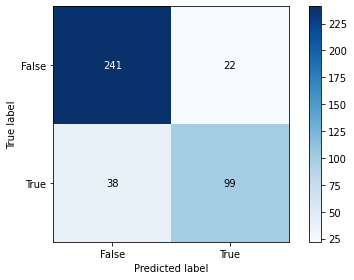

              precision    recall  f1-score   support

       False       0.86      0.92      0.89       263
        True       0.82      0.72      0.77       137

    accuracy                           0.85       400
   macro avg       0.84      0.82      0.83       400
weighted avg       0.85      0.85      0.85       400



In [42]:

plot_confusion_matrix(conf_mtrx_knn, np.unique(df.isVirus), cmap=plt.cm.Blues)
print(classification_report_knn)


In our KNN model, 22 viruses were incorrectly detected, and 38 data points were falsely classified as viruses. In the following confusion matrices, we will assume that the company's main goal is to correctly detect viruses and that issuing a false positive warning is only a precautionary measure that would not create a significant problem. Therefore, we will consider TP value more important.

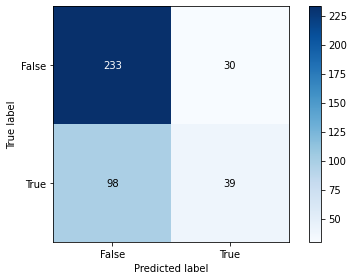

              precision    recall  f1-score   support

       False       0.70      0.89      0.78       263
        True       0.57      0.28      0.38       137

    accuracy                           0.68       400
   macro avg       0.63      0.59      0.58       400
weighted avg       0.66      0.68      0.65       400



In [99]:
plot_confusion_matrix(conf_mtrx_svm, np.unique(df.isVirus), cmap=plt.cm.Blues)
print(classification_report_svm)

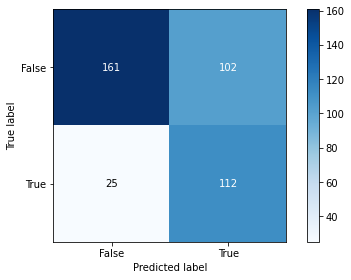

              precision    recall  f1-score   support

       False       0.87      0.61      0.72       263
        True       0.52      0.82      0.64       137

    accuracy                           0.68       400
   macro avg       0.69      0.71      0.68       400
weighted avg       0.75      0.68      0.69       400



In [100]:
plot_confusion_matrix(conf_mtrx_nb, np.unique(df.isVirus), cmap=plt.cm.Blues)
print(classification_report_nb)



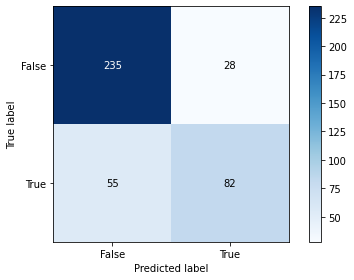

              precision    recall  f1-score   support

       False       0.81      0.89      0.85       263
        True       0.75      0.60      0.66       137

    accuracy                           0.79       400
   macro avg       0.78      0.75      0.76       400
weighted avg       0.79      0.79      0.79       400



In [101]:
plot_confusion_matrix(conf_mtrx_multly, np.unique(df.isVirus), cmap=plt.cm.Blues)
print(classification_report_multly)


Here, we will examine the results obtained from filling the missing values in our model with KNN.

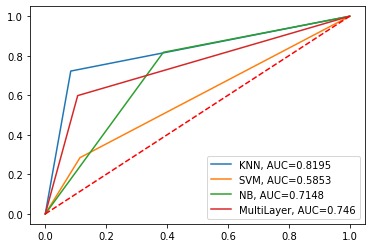

In [102]:
#Let's plot the ROC curves of our algorithms to analyze which algorithm performs better.




from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

plt.figure(0).clf()

y_test_cv = [int(v) for v in y_test]
y_pred_knn_cv = [int(v) for v in y_pred_knn]
y_pred_svm_cv = [int(v) for v in y_pred_svm]
y_pred_nb_cv = [int(v) for v in y_pred_nb]

y_pred_multly_cv = [int(v) for v in y_pred]


fpr, tpr,_ = metrics.roc_curve(y_test_cv, y_pred_knn_cv)
auc = round(metrics.roc_auc_score(y_test_cv, y_pred_knn_cv), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

fpr, tpr,_  = metrics.roc_curve(y_test_cv, y_pred_svm_cv)
auc = round(metrics.roc_auc_score(y_test_cv, y_pred_svm_cv), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

fpr, tpr,_  = metrics.roc_curve(y_test_cv, y_pred_nb_cv)
auc = round(metrics.roc_auc_score(y_test_cv, y_pred_nb_cv), 4)
plt.plot(fpr,tpr,label="NB, AUC="+str(auc))

fpr, tpr,_  = metrics.roc_curve(y_test_cv, y_pred_multly_cv)
auc = round(metrics.roc_auc_score(y_test_cv, y_pred_multly_cv), 4)
plt.plot(fpr,tpr,label="MultiLayer, AUC="+str(auc))


plt.plot([0, 1], [0, 1],'r--')

plt.legend()


In [103]:
import numpy as np
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=2)


X_imputed = imputer.fit_transform(df)

print(X_imputed)


[[-0.23346666  0.30879909  2.48401537  1.73272119  0.        ]
 [ 1.51900328  1.23848178  3.34445044  0.78374449  0.        ]
 [ 0.40064037  1.91674842  3.2910962  -0.91851908  0.        ]
 ...
 [ 4.05902725  1.97743561  2.14475954  4.25721965  0.        ]
 [ 3.45730965  3.96234174  3.77083696  3.24316822  0.        ]
 [ 3.5785215   3.34965446  3.30005748  1.56220853  0.        ]]


Average accuracy in  10 - fold cross-validation for KNN with K= 1  is  0.822962311557789
Average accuracy in  10 - fold cross-validation for KNN with K= 3  is  0.8539698492462311
Average accuracy in  10 - fold cross-validation for KNN with K= 5  is  0.8489623115577889
Average accuracy in  10 - fold cross-validation for KNN with K= 7  is  0.8454673366834171
Average accuracy in  10 - fold cross-validation for KNN with K= 9  is  0.8434698492462311
Average accuracy in  10 - fold cross-validation for KNN with K= 11  is  0.8369623115577889
Average accuracy in  10 - fold cross-validation for KNN with K= 13  is  0.8379623115577889
Average accuracy in  10 - fold cross-validation for KNN with K= 15  is  0.8329572864321608
Average accuracy in  10 - fold cross-validation for KNN with K= 17  is  0.8354572864321608
Average accuracy in  10 - fold cross-validation for KNN with K= 19  is  0.8284547738693467
Average accuracy in  10 - fold cross-validation for KNN with K= 21  is  0.8249572864321608
Avera

Text(0.5, 1.0, 'K-fold Cross Validation, Test Accuracies with respect to K (for KNN)')

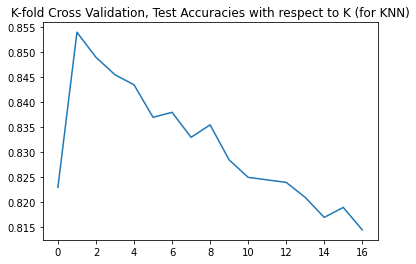

In [114]:
from sklearn.model_selection import StratifiedKFold

from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
#We classify our data over knn by calling the Knn algorithm from the #Sklearn library
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import statistics



scores = []
kfold = 10

skfolds = StratifiedKFold(n_splits=kfold)

bestScore = 0
bestK = 0
for k in range(1, 35, 2):

    knn = KNeighborsClassifier(n_neighbors=k)
    knnScores = cross_val_score(knn, X_imputed, y, cv=kfold, scoring="accuracy")
    X = df.drop('isVirus', axis=1) # featurelar
    imputer = KNNImputer(n_neighbors=2)

    # Eksik değerler KNN algoritması ile dolduruldu
    X_imputed = imputer.fit_transform(X)

    y = df['isVirus'] # hedef sütun

    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)

    y_pred_knn= knn.predict(X_test)

    knnScore = statistics.mean(knnScores)
    scores.append(knnScore)
    
    print('Average accuracy in ', kfold, '- fold cross-validation for KNN with K=', k, ' is ', knnScore)
    if knnScore > bestScore:
        bestScore = knnScore
        bestK = k

print('')
print('Best K is ', bestK, ' with best score as ', bestScore)

plt.plot(scores)
plt.title('K-fold Cross Validation, Test Accuracies with respect to K (for KNN)')


Here, we choose our K value as 3. While our selected value was 85 in our first model, our accuracy value is found as 85.25 here. We will decide by examining the confusion matrices later on.

In [120]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn= knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print('Accuracy:', accuracy)


Accuracy: 0.8525


In [121]:


# Create a multi-layer perceptron neural network
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

# Fit the neural network to the training data
mlp.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.855


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [122]:
##Here again, we call the svm classifier from the sklearn library and get the results."""
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np
import pandas as pd


# SVM sınıflandırıcısını oluşturma
clf = SVC(kernel='linear', C=1, random_state=42)


scores = cross_val_score(clf, X_imputed, y, cv=5)

mean_accuracy = np.mean(scores)

print("Cross-Validation Sonuçları: ", scores)
print("Ortalama Doğruluk Değeri: ", mean_accuracy)


from sklearn import svm

svm = svm.SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


print("Test accuracy score for SVM classification is: ",metrics.accuracy_score(y_test, y_pred_svm))

Cross-Validation Sonuçları:  [0.445      0.27       0.675      0.665      0.66666667]
Ortalama Doğruluk Değeri:  0.5443333333333333
Test accuracy score for SVM classification is:  0.665


In [123]:
##Here, we finally classify using the Naïve Bayes library on our data.
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Test accuracy score for Naive Bayes classification is: ",metrics.accuracy_score(y_test, y_pred_nb))

Test accuracy score for Naive Bayes classification is:  0.68


In [124]:
## Likewise, by calling the confusion_matrix algorithm from the sklearn.metrics library, 
##we create confusion matrixes of the predictions we made above with different classifications.
from sklearn.metrics import confusion_matrix, classification_report

conf_mtrx_knn = confusion_matrix(y_test, y_pred_knn)
conf_mtrx_svm = confusion_matrix(y_test, y_pred_svm)
conf_mtrx_nb = confusion_matrix(y_test, y_pred_nb)
conf_mtrx_multly = confusion_matrix(y_test, y_pred)

classification_report_knn = classification_report(y_test, y_pred_knn)
classification_report_svm = classification_report(y_test, y_pred_svm)
classification_report_nb = classification_report(y_test, y_pred_nb)
classification_report_multly = classification_report(y_test, y_pred)

from matplotlib import pyplot as plt

def plot_confusion_matrix(conf_mtrx, classes, cmap=plt.cm.Blues):
    num_class = conf_mtrx.shape[0]

    fig, ax = plt.subplots()
    im = ax.imshow(conf_mtrx, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(num_class), yticks=np.arange(num_class),
           xticklabels=classes, yticklabels=classes, 
           ylabel='True label', xlabel='Predicted label')

    middle_threshold = conf_mtrx.max() / 2.
    for row in range(num_class):
        for col in range(num_class):
            ax.text(col, row, format(conf_mtrx[row, col], '.0f'), ha="center", va="center",
                    color="white" if conf_mtrx[row, col] > middle_threshold else "black")
    fig.tight_layout()
    plt.show()



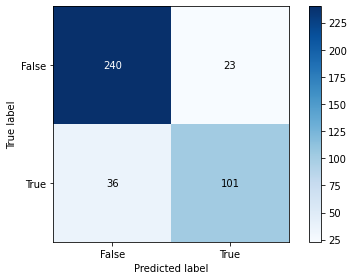

              precision    recall  f1-score   support

       False       0.87      0.91      0.89       263
        True       0.81      0.74      0.77       137

    accuracy                           0.85       400
   macro avg       0.84      0.82      0.83       400
weighted avg       0.85      0.85      0.85       400



In [125]:
plot_confusion_matrix(conf_mtrx_knn, np.unique(df.isVirus), cmap=plt.cm.Blues)
print(classification_report_knn)


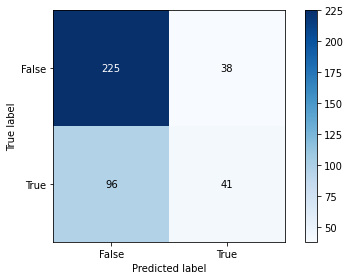

              precision    recall  f1-score   support

       False       0.70      0.86      0.77       263
        True       0.52      0.30      0.38       137

    accuracy                           0.67       400
   macro avg       0.61      0.58      0.58       400
weighted avg       0.64      0.67      0.64       400



In [126]:
plot_confusion_matrix(conf_mtrx_svm, np.unique(df.isVirus), cmap=plt.cm.Blues)
print(classification_report_svm)



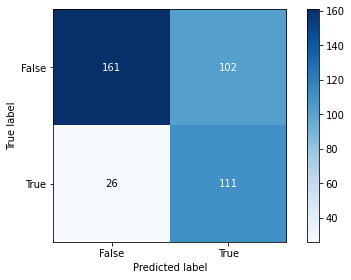

              precision    recall  f1-score   support

       False       0.86      0.61      0.72       263
        True       0.52      0.81      0.63       137

    accuracy                           0.68       400
   macro avg       0.69      0.71      0.67       400
weighted avg       0.74      0.68      0.69       400



In [127]:
plot_confusion_matrix(conf_mtrx_nb, np.unique(df.isVirus), cmap=plt.cm.Blues)
print(classification_report_nb)



As a result, by using KNN to predict missing values and using a multi-layer perceptron neural network model, we only miss 18 viruses. Assuming that the cost of viruses is higher for the company compared to non-viruses, this model has been selected.

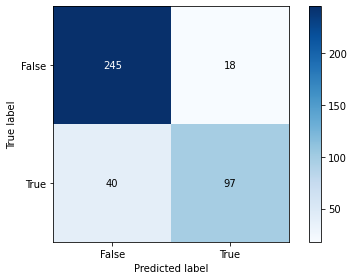

              precision    recall  f1-score   support

       False       0.86      0.93      0.89       263
        True       0.84      0.71      0.77       137

    accuracy                           0.85       400
   macro avg       0.85      0.82      0.83       400
weighted avg       0.85      0.85      0.85       400



In [128]:
plot_confusion_matrix(conf_mtrx_multly, np.unique(df.isVirus), cmap=plt.cm.Blues)
print(classification_report_multly)


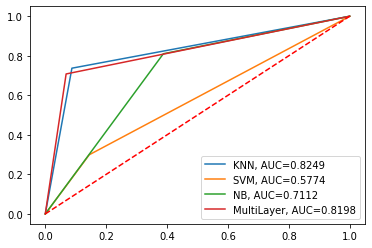

In [129]:
#Sorry about that. Here is the translation
#Let's plot the ROC curves of our algorithms to analyze which algorithm performs better.
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

plt.figure(0).clf()

y_test_cv = [int(v) for v in y_test]
y_pred_knn_cv = [int(v) for v in y_pred_knn]
y_pred_svm_cv = [int(v) for v in y_pred_svm]
y_pred_nb_cv = [int(v) for v in y_pred_nb]

y_pred_multly_cv = [int(v) for v in y_pred]


fpr, tpr,_ = metrics.roc_curve(y_test_cv, y_pred_knn_cv)
auc = round(metrics.roc_auc_score(y_test_cv, y_pred_knn_cv), 4)
plt.plot(fpr,tpr,label="KNN, AUC="+str(auc))

fpr, tpr,_  = metrics.roc_curve(y_test_cv, y_pred_svm_cv)
auc = round(metrics.roc_auc_score(y_test_cv, y_pred_svm_cv), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

fpr, tpr,_  = metrics.roc_curve(y_test_cv, y_pred_nb_cv)
auc = round(metrics.roc_auc_score(y_test_cv, y_pred_nb_cv), 4)
plt.plot(fpr,tpr,label="NB, AUC="+str(auc))

fpr, tpr,_  = metrics.roc_curve(y_test_cv, y_pred_multly_cv)
auc = round(metrics.roc_auc_score(y_test_cv, y_pred_multly_cv), 4)
plt.plot(fpr,tpr,label="MultiLayer, AUC="+str(auc))


plt.plot([0, 1], [0, 1],'r--')

plt.legend()


Our final score and model is that 

In [ ]:
# Create a multi-layer perceptron neural network
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

# Fit the neural network to the training data
mlp.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

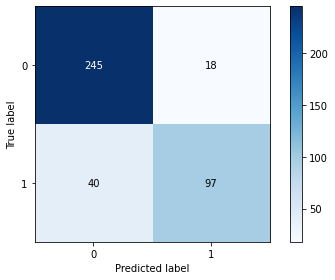

              precision    recall  f1-score   support

       False       0.86      0.93      0.89       263
        True       0.84      0.71      0.77       137

    accuracy                           0.85       400
   macro avg       0.85      0.82      0.83       400
weighted avg       0.85      0.85      0.85       400



In [153]:
plot_confusion_matrix(conf_mtrx_multly, np.unique(df.isVirus), cmap=plt.cm.Blues)
print(classification_report_multly)
